# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_csv('data/human_body_temperature.csv')
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

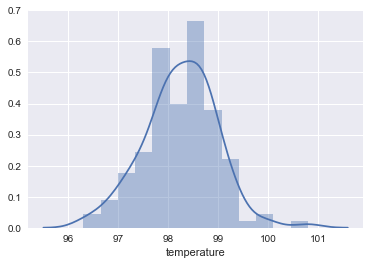

In [30]:
%matplotlib inline
import scipy.stats as stats
#df['temperature'].plot(kind='hist', bins = 10, title = 'Normal Body Temperature (F)')
sns.distplot(df['temperature'])
stats.normaltest(df['temperature'])


Since p-value is 0.258, we cannot reject the null hypothesis. Therefore the body temperature is normally distributed.

In [14]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

The count is 130, which is higher than the conventionally expected standards. Therefore the count size is large. The observations are independent and randomly selected.

In [15]:
import scipy.stats as stats
x = df.temperature
stats.normaltest(x)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

### Since p-value is 0.25, we cannot reject null hypothesis. Therefore the temperature is normally distributed. To check for the tru mean, we need to first calculate the standard Error.

In [16]:

s=0.733183
nsquareroot=130**0.5
SE= s/nsquareroot
SE

0.06430440297695857

### Z value can be calculated with the SE. Since we have 130 sample points , we can use z test for this.
## H0 : Null hypothesis - 98.6 is the true mean
## H1:  Alternative hypothesis - 98.6 is not the true mean

In [17]:

mu= 98.6
x=98.249231
Z=round(float((x-mu)/SE),3)
Z

-5.455

In [32]:
max_CI=x-(Z*SE)
min_CI=x+(Z*SE)
min_CI, max_CI


(97.89845048176069, 98.6000115182393)

In [20]:
stats.ttest_1samp(df['temperature'], popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

### since pvalue is so small, we can reject the null hypothesis with 98.6% confidence

In [26]:
stats.ztest(df['temperature'], popmean=98.6)

AttributeError: module 'scipy.stats' has no attribute 'ztest'

In [27]:
df1=df.sample(10)
df1

,temperature,gender,heart_rate
88,98.7,M,73.0
49,97.1,M,82.0
68,98.7,F,82.0
53,98.6,M,78.0
8,98.4,F,84.0
117,97.8,F,71.0
80,98.8,F,73.0
79,97.6,M,74.0
65,97.4,M,70.0
99,98.0,M,74.0


In [24]:
stats.ttest_1samp(df1['temperature'], popmean=98.6)

Ttest_1sampResult(statistic=-1.5212174611483043, pvalue=0.16253081844461578)

### p value is 0.16 which is large hence we cannot reject null hypothesis

In [36]:

CI_low, CI_high = stats.norm.interval(0.95, loc=df.temperature.mean(), scale=df.temperature.std())
merror = float(df.temperature.mean() - CI_low)
CI_low, CI_high, merror

(96.812218185403111, 99.686243353058444, 1.4370125838276664)

### With 95% confidence we can say that anything that falls below 96.8 snf 99.68 is considered abnormal and  margin of error would be 1.435

In [41]:
dfmale=df[df.gender=='M']
dffemale=df[df.gender=='F']


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


### null hypothesis: female and male has same body temperature
### alternative hypothesis: females are warmer than the males

In [42]:
stats.ttest_ind(dfmale['temperature'],dffemale['temperature'])


Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

### Since p value is 0.029 we can reject null hypothesis, hence females are warmer than the males

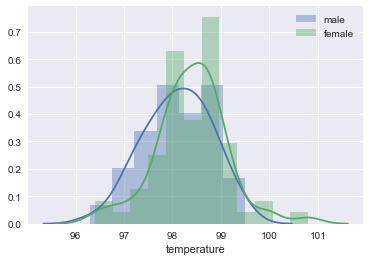

In [44]:
 sns.distplot(dfmale['temperature'], label='male')
 sns.distplot(dffemale['temperature'], label='female')
 plt.legend()